# Alpha-Beta-Pruning

In [2]:
import graphviz as gv
from IPython.display import Image, display

 ## Tests

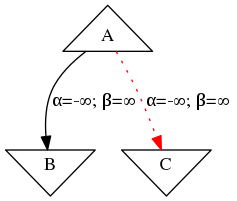

In [3]:
g2 = gv.Digraph(format='png')
# maximizer nodes
g2.attr('node', shape='triangle')
g2.node('max-1', label='A')
# minimizer nodes
g2.attr('node', shape='invtriangle')
g2.node('min-2', label='B')
# add edges
g2.edge('max-1', 'min-2', label='&alpha;=-&infin;; &beta;=&infin;')
g2.node('min-3', label='C')
g2.attr('edge', color='red', style='dotted')
g2.edge('max-1', 'min-3', label='&alpha;=-&infin;; &beta;=&infin;')


# out
g2.render(filename='img/g2')
display(Image(filename='img/g2.png'))


# Production

In [41]:
from algorithm import *
from utility import *

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Without builder for graph

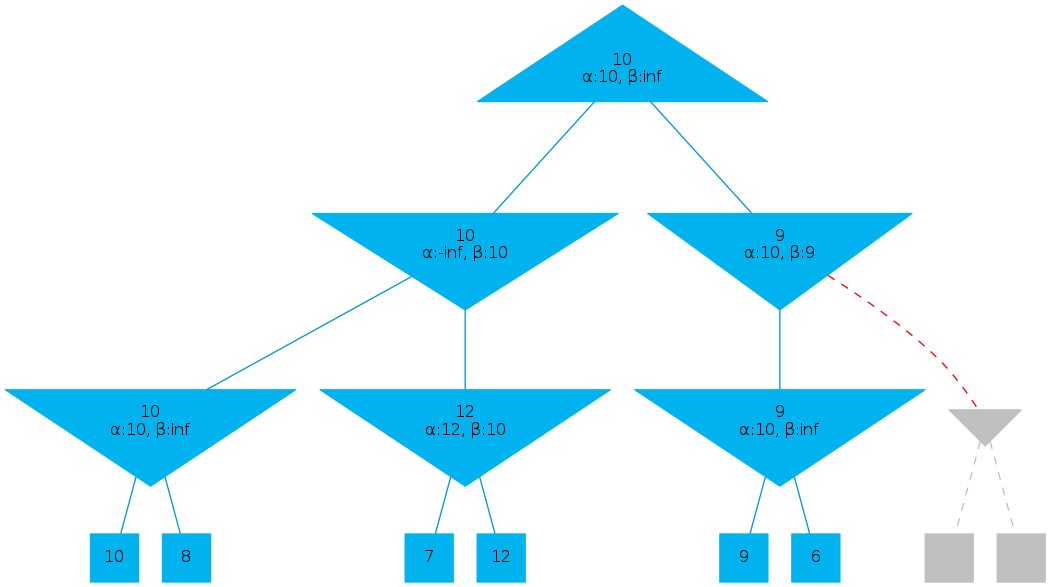

In [55]:
graph = {
    # 1. Layer
    'X': ['A', 'B'],  
    # 2. Layer
    'A': ['AA', 'AB'],  
    'B': ['BA', 'BB'],
    # 3. Layer
    'AA': ['AAA','AAB'],
    'AB': ['ABA','ABB'],
    'BA': ['BAA','BAB'],
    'BB': ['BBA','BBB'],  
    #4. Layer
    'AAA': 10,
    'AAB': 8,
    'ABA': 7,
    'ABB': 12,
    'BAA': 9,
    'BAB': 6,
    'BBA': 4,
    'BBB': 17,
}
graph2 = {
     # 1. Layer
    'X': ['A', 'B', 'C'],  
    # 2. Layer
    'A': ['AA', 'AB', 'AC'],  
    'B': ['BA', 'BB', 'BC'],
    'C': ['CA', 'CB', 'CC'],
    # 3. Layer
    'AA': 15,
    'AB': 33,
    'AC': 22,
    'BA': 9,
    'BB': 4,
    'BC': 9,
    'CA': 3,
    'CB': 1,
    'CC': 2,   
}
desc = alpha_beta(graph)
digraph = build_viz(graph.keys(), graph, desc, branching_factor=2)
digraph.render(filename='img/graph')
display(Image(filename='img/graph.png'))


## With builder for graph

{ 
   X: ['X0', 'X1', 'X2']
   X0: ['X00', 'X01', 'X02']
   X1: ['X10', 'X11', 'X12']
   X2: ['X20', 'X21', 'X22']
   X00: 10
   X01: 8
   X02: 7
   X10: 12
   X11: 9
   X12: 6
   X20: 4
   X21: 17
   X22: 20
}


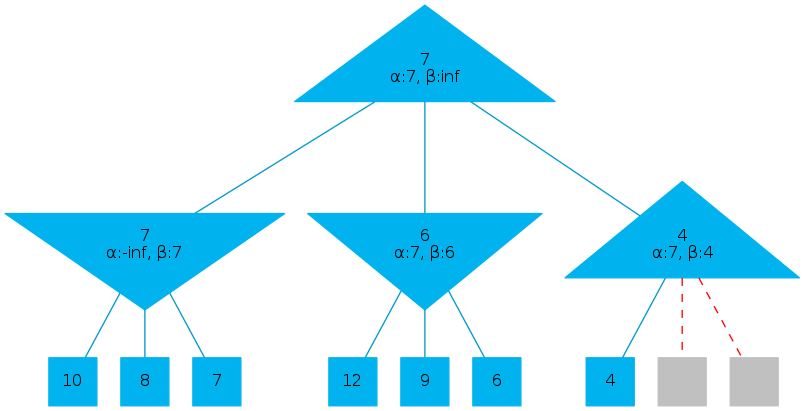

In [53]:
order, graph2 = build_graph([10, 8, 7, 12, 9, 6 , 4, 17, 20], branching_factor=3) 
# TODO build random graph by amount of layers and build a method to get best order.
print_pretty(graph2, order)

desc = alpha_beta(graph2, root=order[0])
#print_pretty(desc, order)

viz = build_viz(order, graph2, desc, branching_factor=3)

viz.render(filename='img/graph2')
display(Image(filename='img/graph2.png'))
